# CSCA 5622 Supervised Learning Final Project

## Default of Credit Card Clients

Citation: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

The dataset includes information on credit card default payments by customers in Taiwan over a six-month period. This data will be utilized to evaluate the predictive accuracy of various machine learning algorithms designed to forecast whether customers will default on their credit card payments. Such analysis is crucial for businesses to forecast revenue and understand the financial impact of credit card defaults. <br />

Here are some of the characteristics about the data (Note, some of these have been provided by the UCI ML Repository and simply copy-pasted):

Data Set Characteristics: Multivariate <br />
Number of Instances: 30000 <br />
Number of Attributes: 24 <br />
Associated Tasks: Classification    <br />
Date Donated: 2016-01-26 <br />

## Detailed Information:

This research utilized a binary variable, default payment (Yes = 1, No = 0), as the response variable. The study reviewed existing literature and identified the following 23 explanatory variables labeled X1 to X23:

X1: Amount of the given credit (NT dollars), including both individual and family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (years).

X6 - X11: History of past payments, tracking monthly payment records from April to September 2005:

X6: Repayment status in September 2005
X7: Repayment status in August 2005
...
X11: Repayment status in April 2005
The repayment status is measured on the following scale: -1 = paid on time; 1 = one month delay; 2 = two months delay; ...; 8 = eight months delay; 9 = nine months or more delay.

X12 - X17: Amount of bill statement (NT dollars):

X12: Amount in September 2005
X13: Amount in August 2005
...
X17: Amount in April 2005
X18 - X23: Amount of previous payment (NT dollars):

X18: Amount paid in September 2005
X19: Amount paid in August 2005
...
X23: Amount paid in April 2005

In [178]:
# Import all necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from scipy.stats import norm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,  roc_auc_score, roc_curve, precision_score, recall_score
from six import StringIO
from IPython.display import Image
import pydotplus




## Data Formatting And Cleaning

Data must be formatted and cleaned so that extra features and incorrect/invalid data can be removed to make our models as accurate as they can be. Majority of the data has already been cleaned and provided with it ready to be used for ML applications, thus not much data cleaning is needed but I decided to drop the ID column early since it does not relate to any other feature. I also made a quick heatmap to see any null values that might need to be replaced or removed. All data types are ints and after making a correlation matrix to identify features to drop, we are ready to start running our models.

In [193]:
# Load data from google drive and check the shape
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/Credit_Clients.csv")
df.shape
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0
PAY_5,0


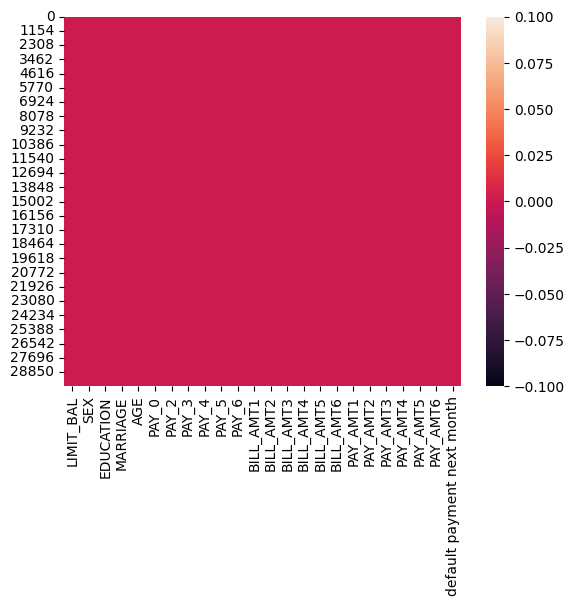

In [194]:
# Drop 'ID' and check for null values.  A heatmap is a good vizualization of this

df.drop('ID', axis=1, inplace=True)
sns.heatmap(df.isnull());
null_values = pd.DataFrame(df.isnull().sum())
null_values

In [187]:
# Remove Any Duplicates and Print Data Types
df = df.drop_duplicates()
print(df.dtypes)

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


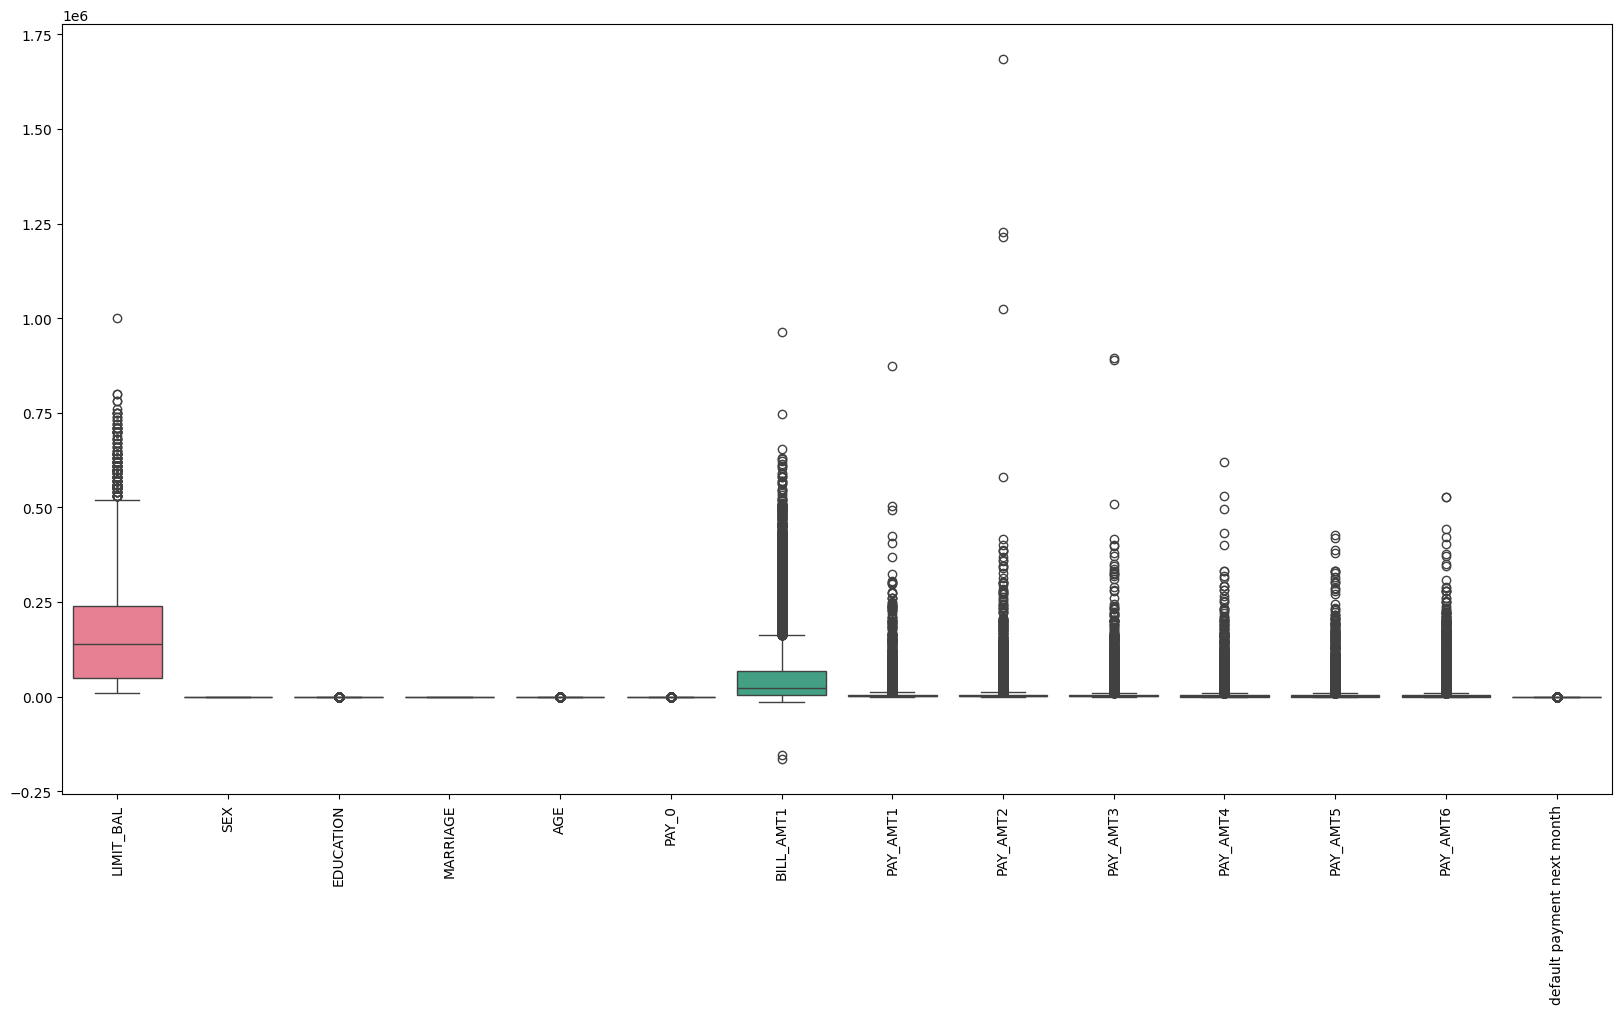

In [229]:
#Box Plot of Features
plt.figure(figsize=(20,10));
sns.boxplot(data=df);
plt.xticks(rotation = 90);

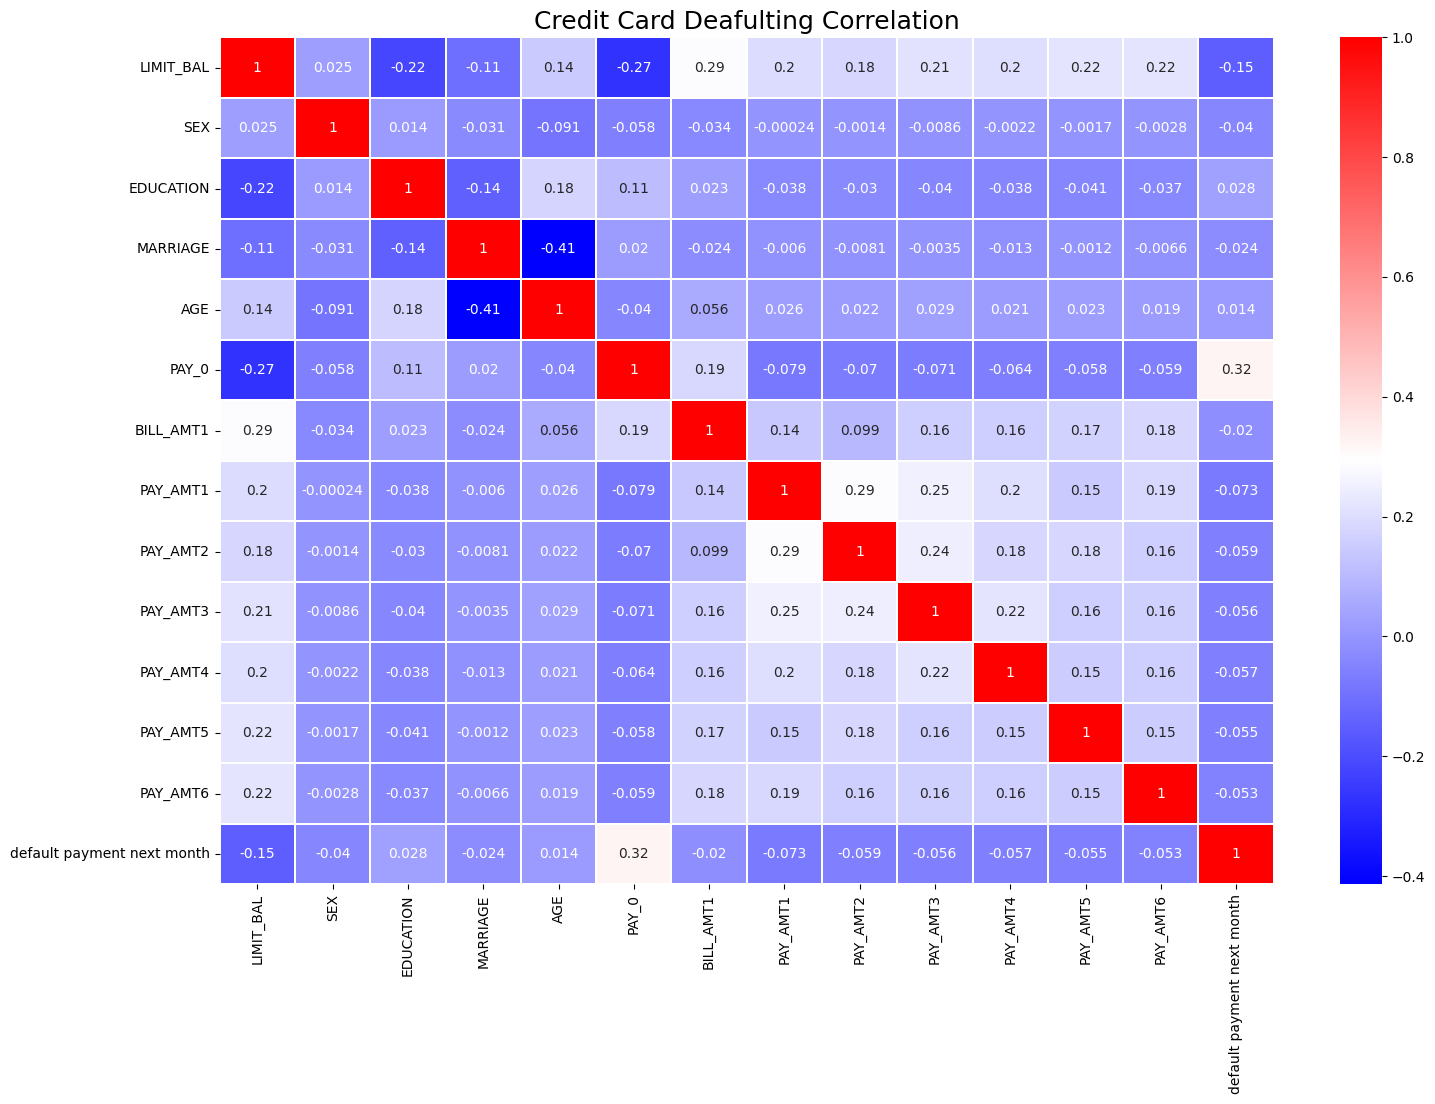

In [228]:
# Correlation Matrix To Check Most Correlated Features
corr = df.corr()
plt.figure(figsize = (17,11))
plt.title('Credit Card Deafulting Correlation', fontsize=18)
sns.heatmap(corr,annot=True,cmap='bwr', linewidths=.02)
plt.show();

In [195]:
# Drop features that are highly correlated
drop_list = ['PAY_2','PAY_3','PAY_4','PAY_5','PAY_6', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6']

for col in drop_list:
    df.drop(col , axis=1, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,3913,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2682,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,29239,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,46990,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,8617,2000,36681,10000,9000,689,679,0


## Machine Learning Models

For the final, I chose a variety of machine learning models as these are all proficient with classifying data sets that are stored in a binary form.

Logistic Regression <br />
Logistic Regression W/ GridSearch* <br />
Decision Tree <br />
Decision Tree W/ GridSearch* <br />
Random Forest <br />
Random Forest W/ GridSearch* <br />
Adaptive Boost with Decision Tree <br />

*Note: Since I am using Google Colab, GridSearch models are not properly displayed

In [198]:
# Make Test/Train Data And Standardize
X = df.drop(columns=['default payment next month'], axis=1)
y = df['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)

print(f'Train shape: {X_train.shape}\nTest shape: {y_train.shape}')
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train shape: (22500, 13)
Test shape: (22500,)


### Logistic Regression

In [141]:
LogReg = LR(solver = 'newton-cg')
LogReg.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [200]:
logreg_pp = LogReg.predict_log_proba(X_test)
logreg_y_pred = LogReg.predict(X_test)
# Confusion Matrix
pd.DataFrame(confusion_matrix(y_test, logreg_y_pred, labels=[0,1]))

,0,1
0,5723,145
1,1235,397


#### Logistic Regression Results

Logistic Regression Prediction Results: 
Accuracy: 0.816
Cross Validation Accuracy: 0.807
Precision: 0.732
Recall: 0.243


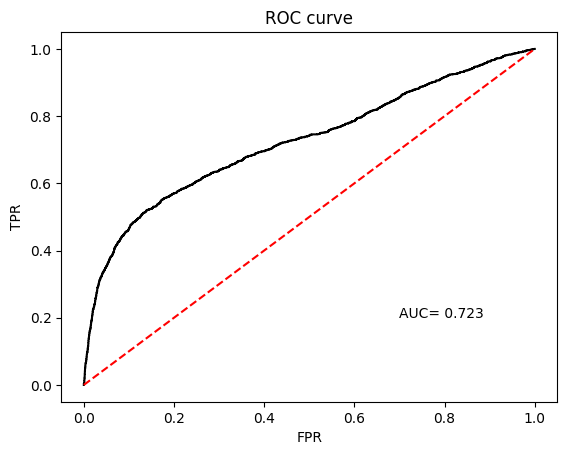

In [202]:
logreg_acc = LogReg.score(X_test,y_test)
logreg_prec = precision_score(y_test, logreg_y_pred)
logreg_recall = recall_score(y_test, logreg_y_pred)
logreg_cv_score = cross_val_score(LogReg, X_train, y_train, cv=10).mean()
# Print Results
print("Logistic Regression Prediction Results: ")
print("Accuracy: {:.3f}".format(logreg_acc))
print("Cross Validation Accuracy: {:.3f}".format(logreg_cv_score))
print('Precision: {:.3f}'.format(logreg_prec))
print('Recall: {:.3f}'.format(logreg_recall))
# Graph Results
fpr,tpr,th = roc_curve(y_test, logreg_pp[:,1])
lg_auc = roc_auc_score(y_test, logreg_pp[:,1])
plt.plot(fpr,tpr, 'k-')
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), 'r--')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.text(0.7,0.2, 'AUC= ' + "{:.3f}".format(lg_auc));

### Logistic Regression w/ GridSearch

In [206]:
params = { 'penalty': ['l2','none'], 'C': [ 0.001, 0.01, 0.1, 1, 10, 32, 100, 200], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}
lr = LR(multi_class='auto', random_state=25, n_jobs=-1)
LogReg_GS = GridSearchCV(lr,params,cv=10, n_jobs=-1, verbose=1)
LogReg_GS.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters



GridSearchCV(cv=10, estimator=LogisticRegression(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 32, 100, 200],
                         'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             verbose=1)

In [207]:
logreg_pp_gs = LogReg_GS.predict_proba(X_test)
logreg_y_pred_gs = LogReg_GS.predict(X_test)
logreg_gs_cross_validation = LogReg_GS.best_score_
logreg_gs_prec = precision_score(y_test,logreg_y_pred_gs)
logreg_gs_acc = LogReg_GS.score(X_test,y_test)
logreg_gs_recall = recall_score(y_test,logreg_y_pred_gs)
# Confusion Matrix
pd.DataFrame(confusion_matrix(y_test, logreg_y_pred_gs, labels=[0,1]))

,0,1
0,5689,155
1,1236,412


#### Logistic Regression w/ Gridsearch Results

GridSearch Logistic Regression Prediction Results: 
Best Logistic Regression Parameters: {'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg'}
Cross Validation Accuracy: 0.810
Accuracy: 0.814
Precision: 0.727
Recall: 0.250


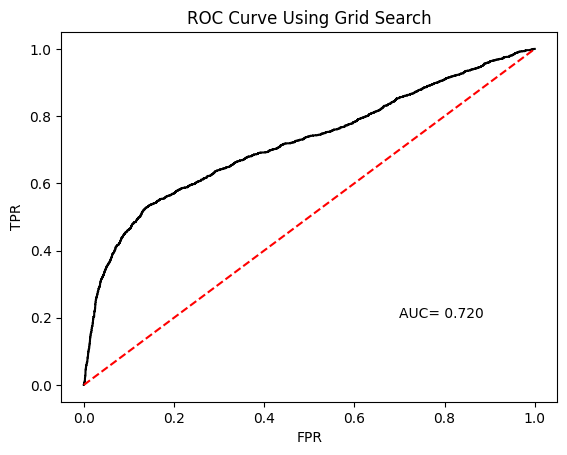

In [208]:
# Print Results
print("GridSearch Logistic Regression Prediction Results: ")
print("Best Logistic Regression Parameters: {}".format(LogReg_GS.best_params_))
print("Cross Validation Accuracy: {:.3f}".format(logreg_gs_cross_validation))
print("Accuracy: {:.3f}".format(logreg_gs_acc))
print('Precision: {:.3f}'.format(logreg_gs_prec))
print('Recall: {:.3f}'.format(logreg_gs_recall))
# Graph Results
fpr,tpr,th = roc_curve(y_test, logreg_pp_gs[:,1])
lg_gs_auc = roc_auc_score(y_test, logreg_pp_gs[:,1])
plt.plot(fpr,tpr, 'k-')
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), 'r--')
plt.title('ROC Curve Using Grid Search')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.text(0.7,0.2, 'AUC= ' + "{:.3f}".format(lg_gs_auc));

### Decision Tree

In [211]:
dtc = DTC(criterion='gini', max_depth=3,  random_state=25)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=25)

#### Decision Tree Graph

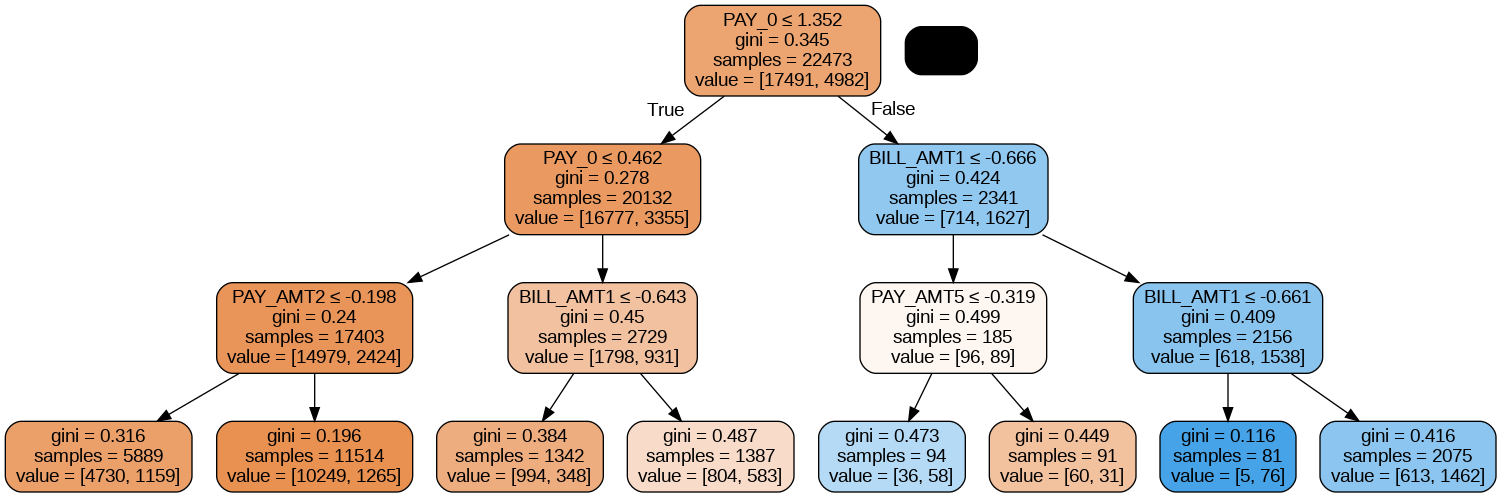

In [212]:
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, filled=True,feature_names=X.columns, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [213]:
pp_dtc = dtc.predict_proba(X_test)
y_pred_dtc = dtc.predict(X_test)
dtc_acc = dtc.score(X_test,y_test)
dtc_prec = precision_score(y_test, y_pred_dtc)
dtc_recall = recall_score(y_test, y_pred_dtc)
dtc_cv_score = cross_val_score(dtc, X_train, y_train, cv=10).mean()
# Confusion Matrix
pd.DataFrame(confusion_matrix(y_test, y_pred_dtc, labels=[0,1]))

,0,1
0,5626,218
1,1121,527


#### Decision Tree Results

Decision Tree Prediction Results: 
Cross Validation Accuracy: 0.820
Accuracy: 0.821
Precision: 0.707
Recall: 0.320


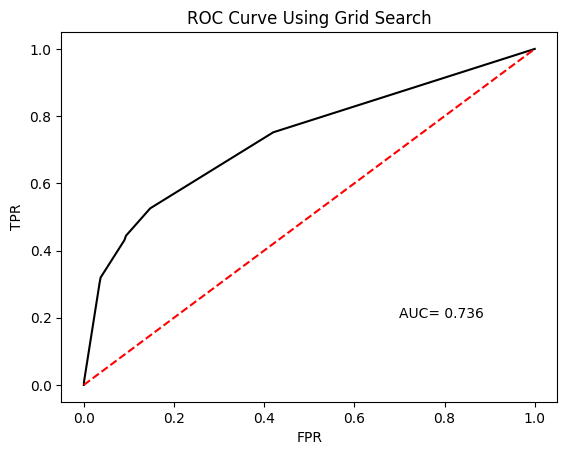

In [214]:
# Print Results
print("Decision Tree Prediction Results: ")
print("Cross Validation Accuracy: {:.3f}".format(dtc_cv_score))
print("Accuracy: {:.3f}".format(dtc_acc))
print('Precision: {:.3f}'.format(dtc_prec))
print('Recall: {:.3f}'.format(dtc_recall))
# Graph Results
fpr,tpr,th = roc_curve(y_test, pp_dtc[:,1])
dtc_auc = roc_auc_score(y_test,pp_dtc[:,1])
plt.plot(fpr,tpr, 'k-')
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), 'r--')
plt.title('ROC Curve Using Grid Search')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.text(0.7,0.2, 'AUC= ' + "{:.3f}".format(dtc_auc));

### Decision Tree w/ GridSearch

In [215]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [ 2, 5, 8, 10, 15],
    'max_leaf_nodes': [ 2, 5, 8, 10, 16],
    'min_samples_leaf': [1,2,4,10,20]
}

dtc = DTC()
DTC_GS = GridSearchCV(dtc,params, cv=10, n_jobs=-1, verbose=1)
DTC_GS.fit(X_train, y_train)

Fitting 10 folds for each of 375 candidates, totalling 3750 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 5, 8, 10, 15],
                         'max_leaf_nodes': [2, 5, 8, 10, 16],
                         'min_samples_leaf': [1, 2, 4, 10, 20]},
             verbose=1)

In [216]:
pp_dtc_gs = DTC_GS.predict_proba(X_test)
y_pred_dtc_gs = DTC_GS.predict(X_test)
dtc_gs_acc = DTC_GS.score(X_test,y_test)
dtc_gs_prec = precision_score(y_test, y_pred_dtc_gs)
dtc_gs_recall = recall_score(y_test, y_pred_dtc_gs)
dtc_gs_cross_validation = DTC_GS.best_score_
# Confusion Matrix
pd.DataFrame(confusion_matrix(y_test, y_pred_dtc_gs, labels=[0,1]))

,0,1
0,5493,351
1,1054,594


#### Decision Tree w/ GridSearch Results

GridSearch DTC Prediction Results: 
Best DTC Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_leaf_nodes': 16, 'min_samples_leaf': 20}
Cross Validation Accuracy: 0.820
Accuracy: 0.812
Precision: 0.629
Recall: 0.360


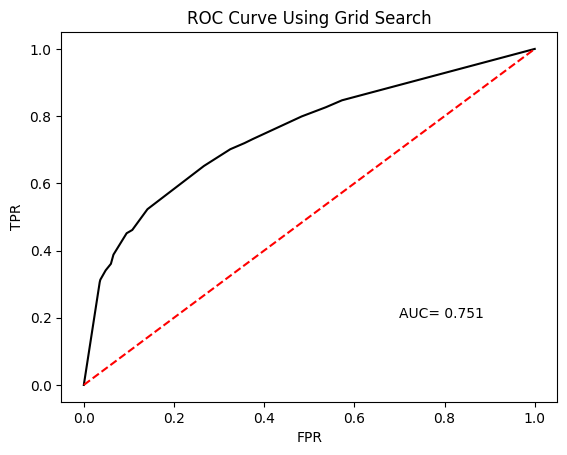

In [217]:
# Print Results
print("GridSearch DTC Prediction Results: ")
print("Best DTC Parameters: {}".format(DTC_GS.best_params_))
print("Cross Validation Accuracy: {:.3f}".format(dtc_gs_cross_validation))
print("Accuracy: {:.3f}".format(dtc_gs_acc))
print('Precision: {:.3f}'.format(dtc_gs_prec))
print('Recall: {:.3f}'.format(dtc_gs_recall))
# Graph Results
fpr,tpr,th = roc_curve(y_test, pp_dtc_gs[:,1])
dtc_gs_auc = roc_auc_score(y_test, pp_dtc_gs[:,1])
plt.plot(fpr,tpr, 'k-')
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), 'r--')
plt.title('ROC Curve Using Grid Search')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.text(0.7,0.2, 'AUC= ' + "{:.3f}".format(dtc_gs_auc));

### Random Forest Decision Tree

In [218]:
rfc = RFC(n_estimators=20)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [219]:
pp_rfc = rfc.predict_proba(X_test)
y_pred_rfc = rfc.predict(X_test)
rfc_acc = rfc.score(X_test,y_test)
rfc_prec = precision_score(y_test, y_pred_rfc)
rfc_recall = recall_score(y_test, y_pred_rfc)
rfc_cv_score = cross_val_score(rfc, X_train, y_train, cv=10).mean()
# Confusion Matrix
pd.DataFrame(confusion_matrix(y_test, y_pred_rfc, labels=[0,1]))

,0,1
0,5525,319
1,1095,553


#### Random Forest Results

Random Forest Prediction Results: 
Cross Validation Accuracy: 0.810
Accuracy: 0.811
Precision: 0.634
Recall: 0.336


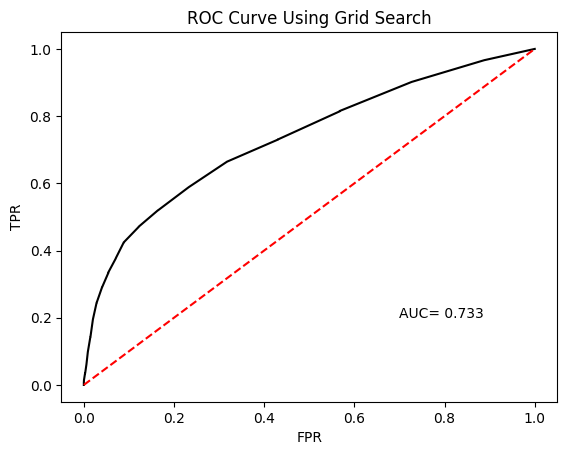

In [220]:
# Print Results
print("Random Forest Prediction Results: ")
print("Cross Validation Accuracy: {:.3f}".format(rfc_cv_score))
print("Accuracy: {:.3f}".format(rfc_acc))
print('Precision: {:.3f}'.format(rfc_prec))
print('Recall: {:.3f}'.format(rfc_recall))
# Graph Results
fpr,tpr,th = roc_curve(y_test, pp_rfc[:,1])
rfc_auc = roc_auc_score(y_test, pp_rfc[:,1])
plt.plot(fpr,tpr, 'k-')
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), 'r--')
plt.title('ROC Curve Using Grid Search')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.text(0.7,0.2, 'AUC= ' + "{:.3f}".format(rfc_auc));

### Random Forest w/ GridSearch

In [221]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [ 2, 5, 8, 10, 15],
    'max_leaf_nodes': [ 2, 5, 8, 10, 15],
    'n_estimators': [4, 6, 8, 10]
}

rfc = RFC()
RFC_GS = GridSearchCV(rfc,params, cv=10, verbose=1)
RFC_GS.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 5, 8, 10, 15],
                         'max_leaf_nodes': [2, 5, 8, 10, 15],
                         'n_estimators': [4, 6, 8, 10]},
             verbose=1)

In [222]:
pp_rfcgs = RFC_GS.predict_proba(X_test)
y_pred_rfcgs = RFC_GS.predict(X_test)
rfc_gs_acc = RFC_GS.score(X_test,y_test)
rfc_gs_prec = precision_score(y_test, y_pred_rfcgs)
rfc_gs_recall = recall_score(y_test, y_pred_rfcgs)
rfc_gs_cross_validation = RFC_GS.best_score_
# Confusion Matrix
pd.DataFrame(confusion_matrix(y_test, y_pred_rfcgs, labels=[0,1]))

,0,1
0,5631,213
1,1153,495


#### Random Forest w/ GridSearch Results

GridSearch Random Forest Prediction Results: 
Best Random Forest Parameters: {'criterion': 'gini', 'max_depth': 15, 'max_leaf_nodes': 15, 'n_estimators': 6}
Cross Validation Accuracy: 0.816
Accuracy: 0.818
Precision: 0.699
Recall: 0.300


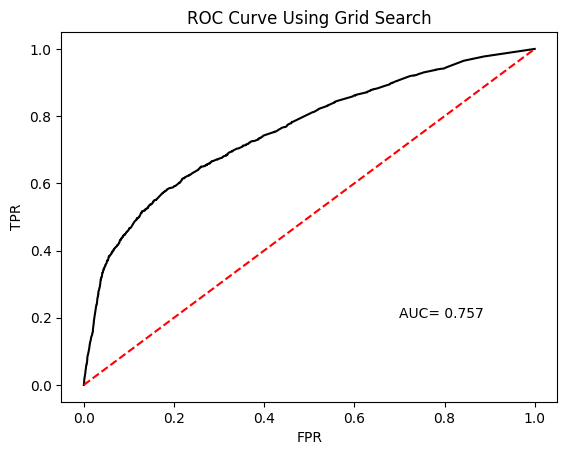

In [223]:
# Predict Results
print("GridSearch Random Forest Prediction Results: ")
print("Best Random Forest Parameters: {}".format(RFC_GS.best_params_))
print("Cross Validation Accuracy: {:.3f}".format(rfc_gs_cross_validation))
print("Accuracy: {:.3f}".format(rfc_gs_acc))
print('Precision: {:.3f}'.format(rfc_gs_prec))
print('Recall: {:.3f}'.format(rfc_gs_recall))
# Graph Results
fpr,tpr,th = roc_curve(y_test, pp_rfcgs[:,1])
rfc_gs_auc = roc_auc_score(y_test, pp_rfcgs[:,1])
plt.plot(fpr,tpr, 'k-')
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), 'r--')
plt.title('ROC Curve Using Grid Search')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.text(0.7,0.2, 'AUC= ' + "{:.3f}".format(rfc_gs_auc));

### AdaBoost Classifier

In [224]:
abc = AdaBoostClassifier(DTC(max_depth=3), n_estimators=100, random_state=25)
abc.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=100, random_state=25)

In [225]:
pp_abc = abc.predict_proba(X_test)
y_pred_abc = abc.predict(X_test)
abc_acc = abc.score(X_test,y_test)
abc_prec = precision_score(y_test, y_pred_abc)
abc_recall = recall_score(y_test, y_pred_abc)
abc_cv_score = cross_val_score(abc, X_train, y_train, cv=10).mean()
# Confusion Matrix
pd.DataFrame(confusion_matrix(y_test, y_pred_abc, labels=[0,1]))

,0,1
0,5447,397
1,1060,588


#### AdaBoost Classifier Results

Adaboost Prediction Results: 
Cross Validation Accuracy: 0.802
Accuracy: 0.806
Precision: 0.597
Recall: 0.357


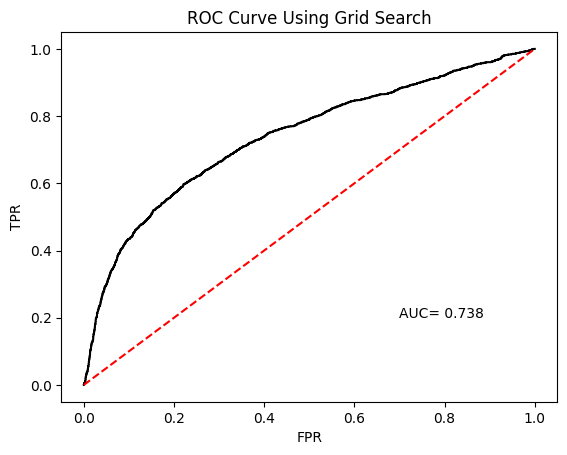

In [226]:
# Print Results
print("Adaboost Prediction Results: ")
print("Cross Validation Accuracy: {:.3f}".format(abc_cv_score))
print("Accuracy: {:.3f}".format(abc_acc))
print('Precision: {:.3f}'.format(abc_prec))
print('Recall: {:.3f}'.format(abc_recall))
# Graph Results
fpr,tpr,th = roc_curve(y_test, pp_abc[:,1])
ada_auc = roc_auc_score(y_test, pp_abc[:,1])
plt.plot(fpr,tpr, 'k-')
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), 'r--')
plt.title('ROC Curve Using Grid Search')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.text(0.7,0.2, 'AUC= ' + "{:.3f}".format(ada_auc));

### Combined Results Analysis

In [227]:
metrics=['Accuracy', 'CV accuracy', 'Precision','Recall','ROC AUC']

# Graph Collected Results

fig = go.Figure(data=[
    go.Bar(name='Logistic Regression', x=metrics, y=[logreg_acc,logreg_cv_score,logreg_prec,logreg_recall, lg_auc]),
    go.Bar(name='Logistic Regression w/ Grid Search', x=metrics, y=[logreg_gs_acc,logreg_gs_cross_validation,logreg_gs_prec,logreg_gs_recall, lg_gs_auc]),
    go.Bar(name='Decision Tree Classifier', x=metrics, y=[dtc_acc,dtc_cv_score ,dtc_prec,dtc_recall, dtc_auc]),
    go.Bar(name='Decision Tree Classifier w/ Grid Search', x=metrics, y=[dtc_gs_acc,dtc_gs_cross_validation,dtc_gs_prec,dtc_gs_recall, dtc_gs_auc]),
    go.Bar(name='Random Forest Classifier', x=metrics, y=[rfc_acc,rfc_cv_score, rfc_prec,rfc_recall, rfc_auc]),
    go.Bar(name='Random Forest Classifier w/ Grid Search', x=metrics, y=[rfc_gs_acc,rfc_gs_cross_validation,rfc_gs_prec,rfc_gs_recall, rfc_gs_auc]),
    go.Bar(name='AdaBoost w/ Decision Tree Classifier', x=metrics, y=[abc_acc,abc_cv_score,abc_prec,abc_recall, ada_auc]),
])

fig.update_layout(title_text='Metrics for each model',
              barmode='group',xaxis_tickangle=-45,bargroupgap=0.05)
fig.show()

### Discussion And Conclusion

Among all the models selected for this project, none demonstrated a significantly superior ability to predict credit card debt default compared to the others. The Decision Tree Classifier, both with and without grid search optimization, exhibited the highest accuracy, cross-validation accuracy, and recall. Conversely, the Logistic Regression model achieved the highest precision, while the Random Forest model attained the best Area Under the Curve (AUC) score. Despite these variations, it is evident that none of the models performed particularly well overall.

A critical factor contributing to the suboptimal performance across nearly all metrics appears to be the limited number of features within the dataset. Initially, the dataset comprised 24 features, including an ID feature and the target variable, which were excluded from the feature set, leaving 22 features. Further analysis revealed that 12 of these features were highly correlated with each other, necessitating the removal of 10 redundant features. Consequently, the final machine learning models were trained on only 10 features.

The insufficient number of features likely hindered the models' ability to capture the complexity of the underlying patterns in the data, leading to poorer performance. This insight underscores the importance of having a rich and diverse feature set for successful predictive modeling. In future projects, it will be essential to ensure that the dataset includes a sufficient number of relevant features to enhance the performance of machine learning models. Additionally, exploring methods to engineer new features or acquiring supplementary data could be beneficial strategies to improve model accuracy and reliability.

